<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-05-07 06:54:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  59.7MB/s    in 2.5s    

2025-05-07 06:55:00 (59.7 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 134.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 155.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 104.3 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [46]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [47]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [48]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [49]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [50]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


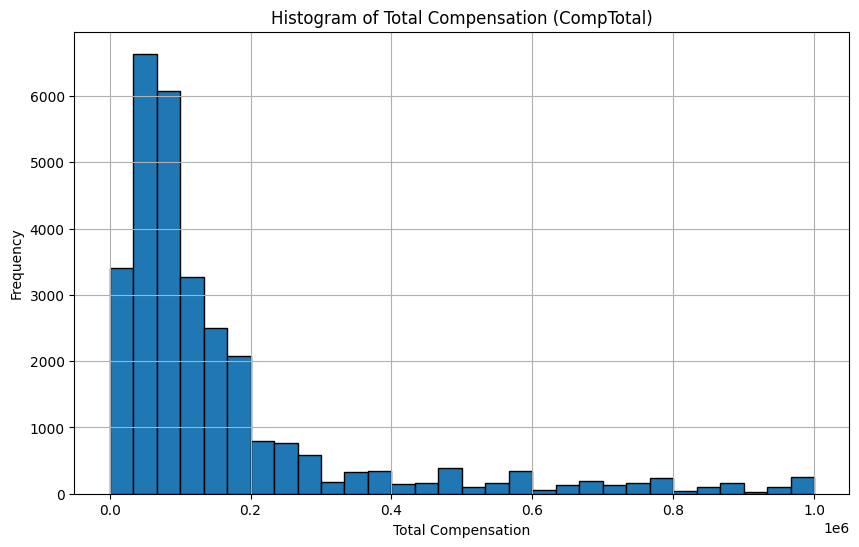

In [6]:

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to select CompTotal, filtering out NULL values and extreme outliers
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
AND CompTotal > 0
AND CompTotal <= 1000000  -- Filter out extreme outliers (e.g., above 1 million)
"""

# Read the query results into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)


plt.show()

**Box Plots**

Plot a box plot of Age.


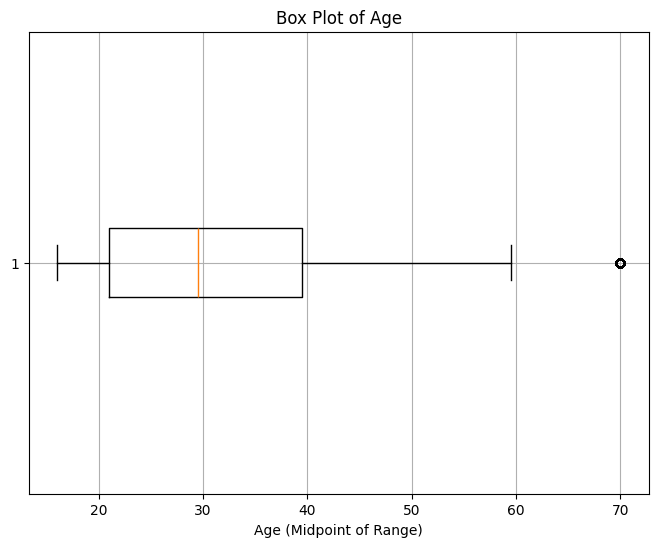

In [52]:


# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to select Age from the main table
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""

# Read the query results into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Define a function to map age ranges to midpoints
def age_to_midpoint(age):
    if age == 'Under 18 years old':
        return 16  # Approximate midpoint
    elif age == '18-24 years old':
        return 21
    elif age == '25-34 years old':
        return 29.5
    elif age == '35-44 years old':
        return 39.5
    elif age == '45-54 years old':
        return 49.5
    elif age == '55-64 years old':
        return 59.5
    elif age == '65 years or older':
        return 70  # Approximate midpoint
    else:
        return None  # Handle unexpected values

# Apply the mapping to the Age column
df['Age_numeric'] = df['Age'].apply(age_to_midpoint)

# Filter out any None values (if there are unexpected age categories)
df = df.dropna(subset=['Age_numeric'])

# Plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age_numeric'], vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age (Midpoint of Range)')
plt.grid(True)

# Save the plot as an image (required for matplotlib in this context)
plt.savefig('age_boxplot.png')

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


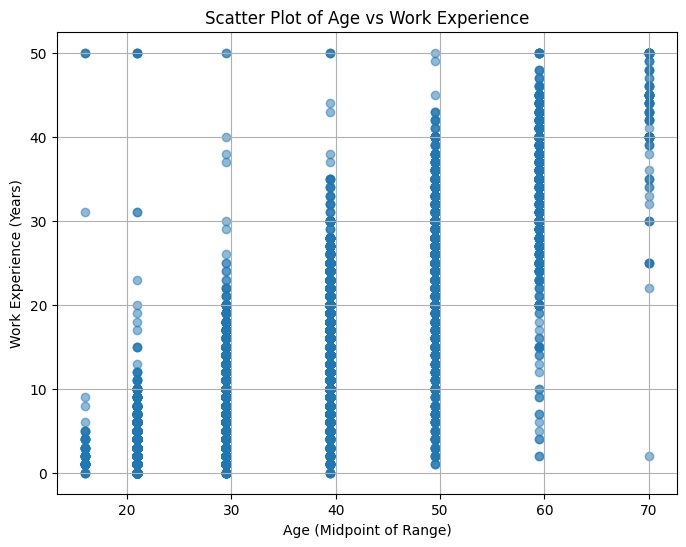

In [7]:


# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to select Age and WorkExp from the main table
QUERY = """
SELECT Age, WorkExp
FROM main
WHERE Age IS NOT NULL
AND WorkExp IS NOT NULL
"""

# Read the query results into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Define a function to map age ranges to midpoints
def age_to_midpoint(age):
    if age == 'Under 18 years old':
        return 16  # Approximate midpoint
    elif age == '18-24 years old':
        return 21
    elif age == '25-34 years old':
        return 29.5
    elif age == '35-44 years old':
        return 39.5
    elif age == '45-54 years old':
        return 49.5
    elif age == '55-64 years old':
        return 59.5
    elif age == '65 years or older':
        return 70  # Approximate midpoint
    else:
        return None  # Handle unexpected values

# Apply the mapping to the Age column
df['Age_numeric'] = df['Age'].apply(age_to_midpoint)

# Filter out rows with None values in Age_numeric or invalid WorkExp
df = df.dropna(subset=['Age_numeric', 'WorkExp'])

# Ensure WorkExp is numeric (in case of any issues)
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')
df = df.dropna(subset=['WorkExp'])

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age_numeric'], df['WorkExp'], alpha=0.5)
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age (Midpoint of Range)')
plt.ylabel('Work Experience (Years)')
plt.grid(True)

# Save the plot as an image
plt.savefig('age_workexp_scatter.png')

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


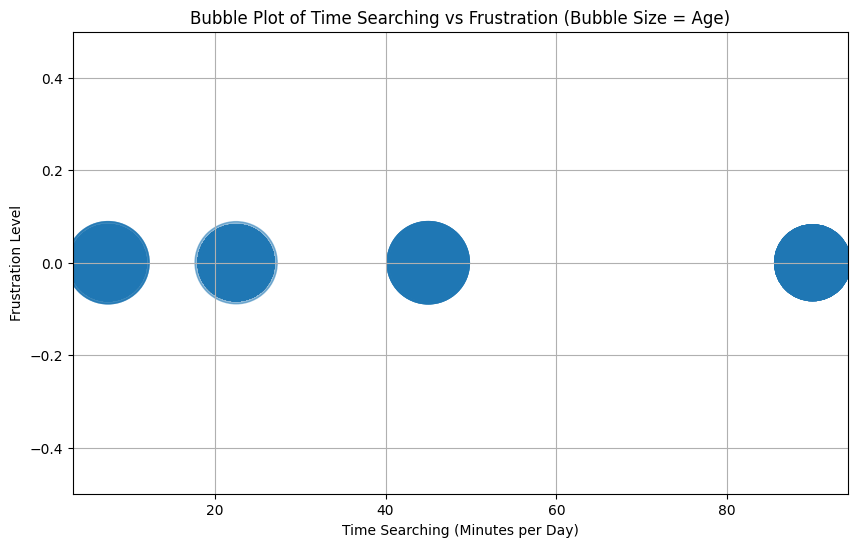

In [27]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to select required columns, filtering out NULL values
QUERY = """
SELECT TimeSearching, Frustration, Age
FROM main
WHERE TimeSearching IS NOT NULL
AND Frustration IS NOT NULL
AND Age IS NOT NULL
"""

# Load data into a DataFrame
df = pd.read_sql_query(QUERY, conn)
conn.close()

# Function to map age to numeric value or use it directly if numeric
def age_to_midpoint(age):
    try:
        return float(age)
    except ValueError:
        age = str(age).strip().lower()
        if 'under 18' in age or 'younger than 18' in age or 'less than 18' in age:
            return 16
        elif '18-24' in age or '18 to 24' in age:
            return 21
        elif '25-34' in age or '25 to 34' in age:
            return 29.5
        elif '35-44' in age or '35 to 44' in age:
            return 39.5
        elif '45-54' in age or '45 to 54' in age:
            return 49.5
        elif '55-64' in age or '55 to 64' in age:
            return 59.5
        elif '65' in age or 'older' in age:
            return 70
        else:
            return None

# Function to map time searching to minutes, corrected typo from 'age' to 'time'
def time_searching_to_minutes(time):
    try:
        return float(time)
    except ValueError:
        time = str(time).strip().lower()
        if 'less than 15' in time or '0-15' in time or 'under 15' in time:
            return 7.5
        elif '15-30' in time or '15 to 30' in time:
            return 22.5
        elif '30-60' in time or '30 to 60' in time or '30 - 60' in time:
            return 45
        elif '1-2' in time or '1 to 2' in time or '60-120' in time or '60 to 120' in time:
            return 90
        elif '2-4' in time or '2 to 4' in time or '120-240' in time or '120 to 240' in time:
            return 180
        elif 'over 4' in time or 'more than 4' in time or 'over 240' in time or 'more than 240' in time:
            return 300
        else:
            return None

# Function to map frustration to numeric value or use it directly if numeric
def frustration_to_numeric(frustration):
    try:
        return float(frustration)
    except ValueError:
        frustration = str(frustration).strip().lower()
        if 'not' in frustration or 'none' in frustration or 'never' in frustration:
            return 0
        elif 'slight' in frustration or 'somewhat' in frustration or 'mild' in frustration:
            return 1
        elif 'moderate' in frustration:
            return 2
        elif 'very' in frustration or 'high' in frustration:
            return 3
        elif 'extreme' in frustration:
            return 4
        else:
            return None

# Apply mappings to create numeric columns
df['Age_numeric'] = df['Age'].apply(age_to_midpoint)
df['TimeSearching_numeric'] = df['TimeSearching'].apply(time_searching_to_minutes)
df['Frustration_numeric'] = df['Frustration'].apply(frustration_to_numeric)

# Remove rows with unmapped (None) values
df = df.dropna(subset=['Age_numeric', 'TimeSearching_numeric', 'Frustration_numeric'])

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df['TimeSearching_numeric'], df['Frustration_numeric'], 
            s=df['Age_numeric']*50, alpha=0.5)
plt.title('Bubble Plot of Time Searching vs Frustration (Bubble Size = Age)')
plt.xlabel('Time Searching (Minutes per Day)')
plt.ylabel('Frustration Level')
plt.ylim(df['Frustration_numeric'].min() - 0.5, df['Frustration_numeric'].max() + 0.5)
plt.grid(True)

# Save the plot to a file
plt.savefig('timesearching_frustration_bubble.png')

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


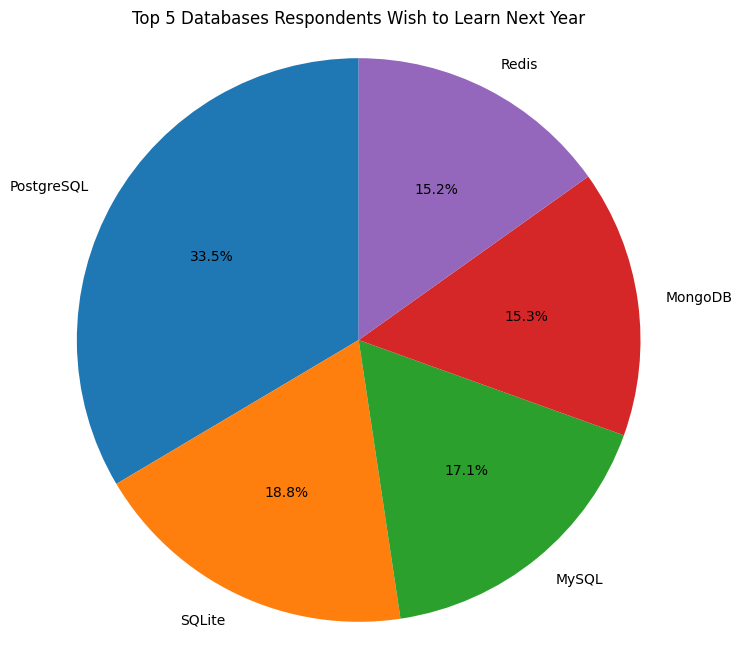

In [31]:

from collections import Counter  # Import Counter 

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to select DatabaseWantToWorkWith from the main table
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""

# Read the query results into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Split the multi-value entries and flatten the list
all_databases = df['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()

# Count the frequency of each database
database_counts = Counter(all_databases)

# Get the top 5 databases
top_5_databases = database_counts.most_common(5)

# Extract labels and sizes for the pie chart
labels, sizes = zip(*top_5_databases)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Save the plot as an image
plt.savefig('top_5_databases_pie_chart.png')

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


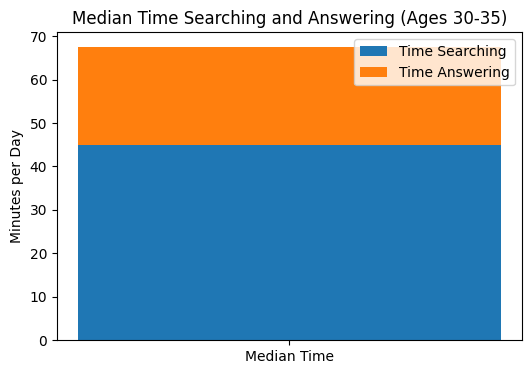

In [33]:

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to select Age, TimeSearching, and TimeAnswering
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age IS NOT NULL
AND TimeSearching IS NOT NULL
AND TimeAnswering IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

# Function to map age ranges to midpoints
def age_to_midpoint(age):
    age = str(age).strip().lower()
    if 'under 18' in age:
        return 16
    elif '18-24' in age:
        return 21
    elif '25-34' in age:
        return 29.5
    elif '35-44' in age:
        return 39.5
    elif '45-54' in age:
        return 49.5
    elif '55-64' in age:
        return 59.5
    elif '65' in age:
        return 70
    else:
        return None

# Apply age mapping
df['Age_numeric'] = df['Age'].apply(age_to_midpoint)

# Filter for ages 30-35 (assuming '25-34' group as closest approximation)
df_filtered = df[df['Age'].str.contains('25-34', case=False, na=False)].copy()

# Function to map time categories to numeric midpoints (in minutes)
def time_to_minutes(time):
    time = str(time).strip().lower()
    if 'less than 15' in time:
        return 7.5
    elif '15-30' in time:
        return 22.5
    elif '30-60' in time:
        return 45
    elif '1-2' in time:
        return 90
    elif '2-4' in time:
        return 180
    elif 'over 4' in time:
        return 300
    else:
        return None

# Apply time mapping using .loc to avoid SettingWithCopyWarning
df_filtered.loc[:, 'TimeSearching_numeric'] = df_filtered['TimeSearching'].apply(time_to_minutes)
df_filtered.loc[:, 'TimeAnswering_numeric'] = df_filtered['TimeAnswering'].apply(time_to_minutes)

# Remove rows with invalid time values
df_filtered = df_filtered.dropna(subset=['TimeSearching_numeric', 'TimeAnswering_numeric'])

# Calculate medians
median_time_searching = df_filtered['TimeSearching_numeric'].median()
median_time_answering = df_filtered['TimeAnswering_numeric'].median()

# Create stacked bar chart
plt.figure(figsize=(6, 4))
plt.bar('Median Time', median_time_searching, label='Time Searching')
plt.bar('Median Time', median_time_answering, bottom=median_time_searching, label='Time Answering')
plt.title('Median Time Searching and Answering (Ages 30-35)')
plt.ylabel('Minutes per Day')
plt.legend()
plt.savefig('stacked_bar_median_times.png')

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


Plot saved as 'median_comptotal_45_60.png'.


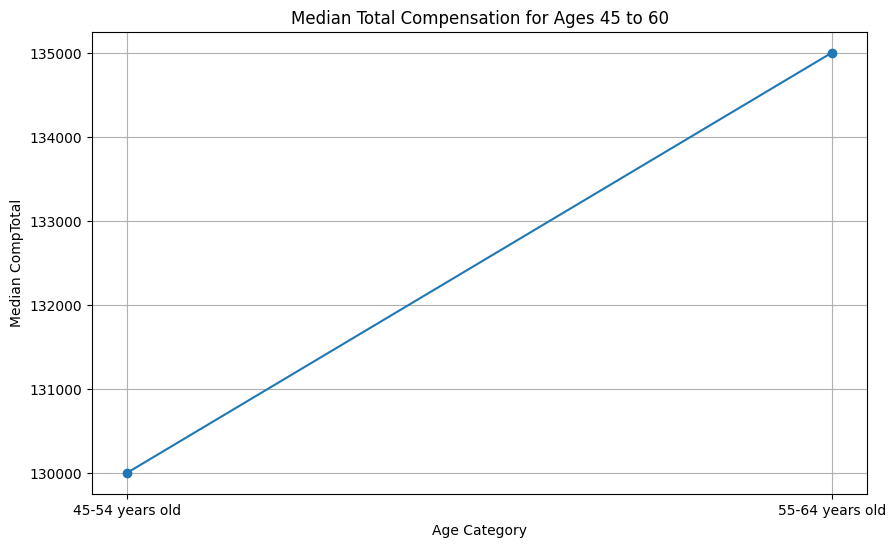

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to select Age and CompTotal for age categories including 45 to 60
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
AND CompTotal IS NOT NULL
AND Age IN ('45-54 years old', '55-64 years old')
"""

# Load data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Convert CompTotal to numeric, coercing errors to NaN
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows with NaN values in CompTotal
df = df.dropna(subset=['CompTotal'])

# Check if there’s any data to plot
if df.empty:
    print("No valid data available for ages 45-60 after cleaning.")
else:
    # Calculate median CompTotal for each age category
    median_comp_by_age = df.groupby('Age')['CompTotal'].median().reset_index()

    # Sort the age categories for proper plotting
    age_order = ['45-54 years old', '55-64 years old']
    median_comp_by_age['Age'] = pd.Categorical(median_comp_by_age['Age'], categories=age_order, ordered=True)
    median_comp_by_age = median_comp_by_age.sort_values('Age')

    # Create the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(median_comp_by_age['Age'], median_comp_by_age['CompTotal'], marker='o')
    plt.title('Median Total Compensation for Ages 45 to 60')
    plt.xlabel('Age Category')
    plt.ylabel('Median CompTotal')
    plt.grid(True)

    # Save the plot as an image file
    plt.savefig('median_comptotal_45_60.png')
    print("Plot saved as 'median_comptotal_45_60.png'.")
    plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


Plot saved as 'main_branch_bar_chart.png'.


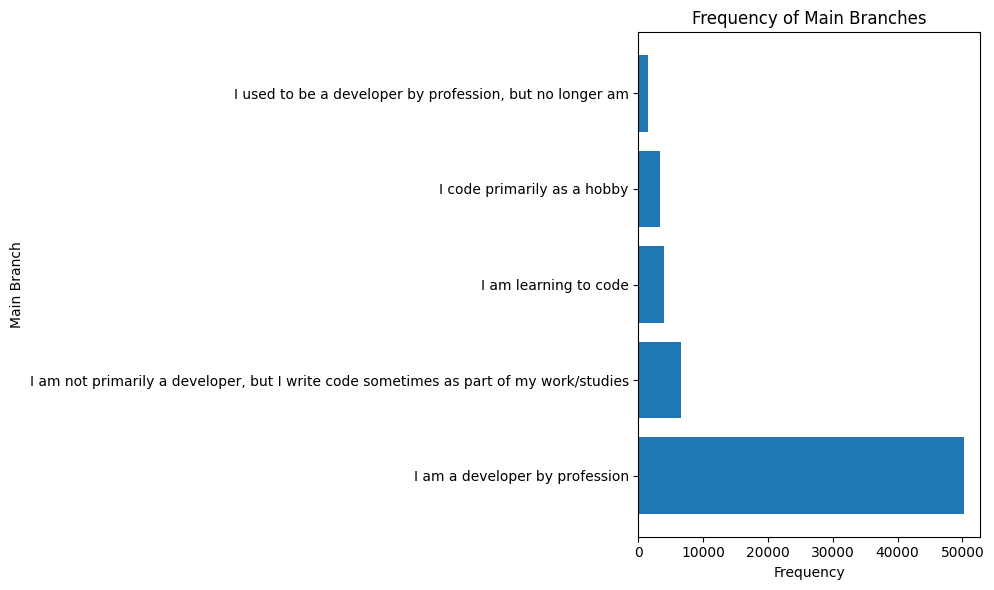

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to select the MainBranch column
QUERY = """
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL
"""

# Load data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Count the frequency of each unique value in MainBranch
branch_counts = df['MainBranch'].value_counts()

# Sort the frequencies in descending order
branch_counts = branch_counts.sort_values(ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(branch_counts.index, branch_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Main Branch')
plt.title('Frequency of Main Branches')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('main_branch_bar_chart.png')
print("Plot saved as 'main_branch_bar_chart.png'.")

# Display the plot
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
